# **Linear Regression**

### Working Of Linear Regression
Linear Regression is a Regression-based algorithm under Supervised Learning. In Regression the target label is in continuous numerical data type.

To understand Linear Regression consider an example to predict the Blood Pressure of the patients. Here Drug Dosage is a feature and Blood Pressure is the label. Now plot Dosages vs Blood Pressure data on a Scatter Plot. In order to predict the target variable on new data, we must have to train and predict the model with the provided dataset. The formula used to predict the target label for unseen data is given:

***`y_pred = W×feature_data + bias`***

By applying the formula we get the predicted value. There shall definitely be a difference between the actual value and predicted value and this difference is known as Loss error. The loss function is defined as the sum of the square of the difference between the actual value and the predicted value.

### Linear Regression In Practice

Linear Regression is a Regression-based algorithm under Supervised Learning. In Regression the target label is in continuous numerical data type.

In [2]:
pip install plotly

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.8 MB 2.4 MB/s eta 0:00:04
   ------ --------------------------------- 1.6/9.8 MB 2.9 MB/s eta 0:00:03
   --------- ------------------------------ 2.4/9.8 MB 3.1 MB/s eta 0:00:03
   ------------ --------------------------- 3.1/9.8 MB 3.4 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.8 MB 3.6 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.8 MB 3.9 MB/s eta 0:00:02
   -------------------------- ------------- 6.6/9.8 MB 4.1 MB/s eta 0:00:01
   ------------------------------- -------- 7.6/9.8 MB 4.3 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.8 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [4]:
import os
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'car_prediction.csv',
 'LinearRegressionOverview.ipynb',
 'medical.csv']

In [5]:
data = pd.read_csv('medical.csv')

In [6]:
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [8]:
le = LabelEncoder()

for i in data.columns:
    if data[i].dtype == 'O':
        data[i] = le.fit_transform(data[i])

In [38]:
sns.set_style("darkgrid")
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (14,7)

In [14]:
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620


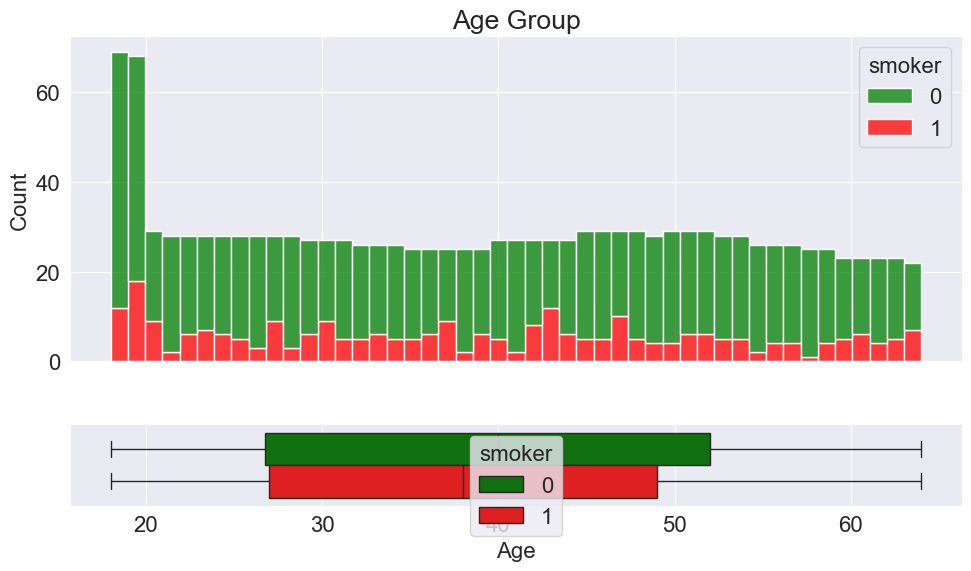

In [39]:
fig, (ax_hist, ax_box) = plt.subplots(
    nrows=2,
    sharex=True,  # Share the x-axis for alignment
    gridspec_kw={"height_ratios": (0.8, 0.2)}, # Adjust height ratios for histogram and box plot
    figsize=(10, 6)
)

# Plot the histogram using Seaborn's histplot
sns.histplot(
    data=data,
    x='age',
    hue='smoker',
    bins=(65 - 18),  # Number of bins
    palette={1: 'red', 0: 'green'}, # Map 'smoker' values to colors
    ax=ax_hist,
    kde=False, # Disable KDE for a cleaner histogram
    multiple='stack' # Stack the bars for different 'smoker' categories
)

# Plot the marginal box plots using Seaborn's boxplot
sns.boxplot(
    data=data,
    x='age',
    hue='smoker',
    palette={1: 'red', 0: 'green'},
    ax=ax_box
)

# Set titles and labels
ax_hist.set_title('Age Group')
ax_hist.set_xlabel('')  # Remove x-label from histogram as it's shared
ax_box.set_xlabel('Age')
ax_box.set_ylabel('') # Remove y-label from box plot

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

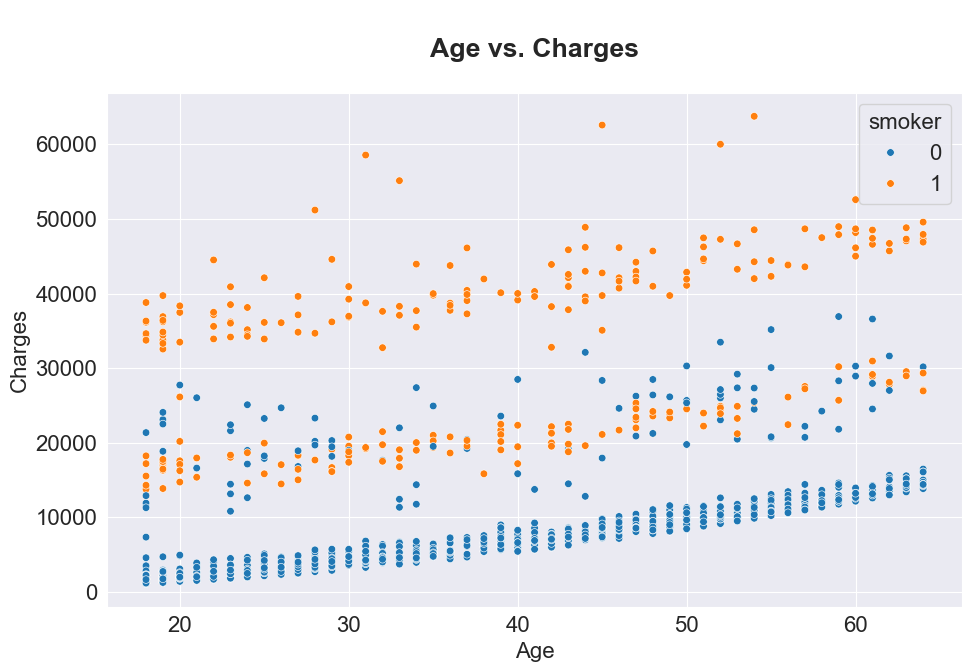

In [40]:
fig = plt.figure(figsize = (10, 7))
sns.scatterplot(
    x = data['age'],
    y = data['charges'],
    hue = data['smoker'],
    s = 30
)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('\nAge vs. Charges\n', fontweight = 'bold')
plt.tight_layout()
plt.show()

In [41]:
data[(data['smoker'] == 1) & (data['age'] == 18)].count()

age         12
sex         12
bmi         12
children    12
smoker      12
region      12
charges     12
dtype: int64

In [42]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<Axes: >

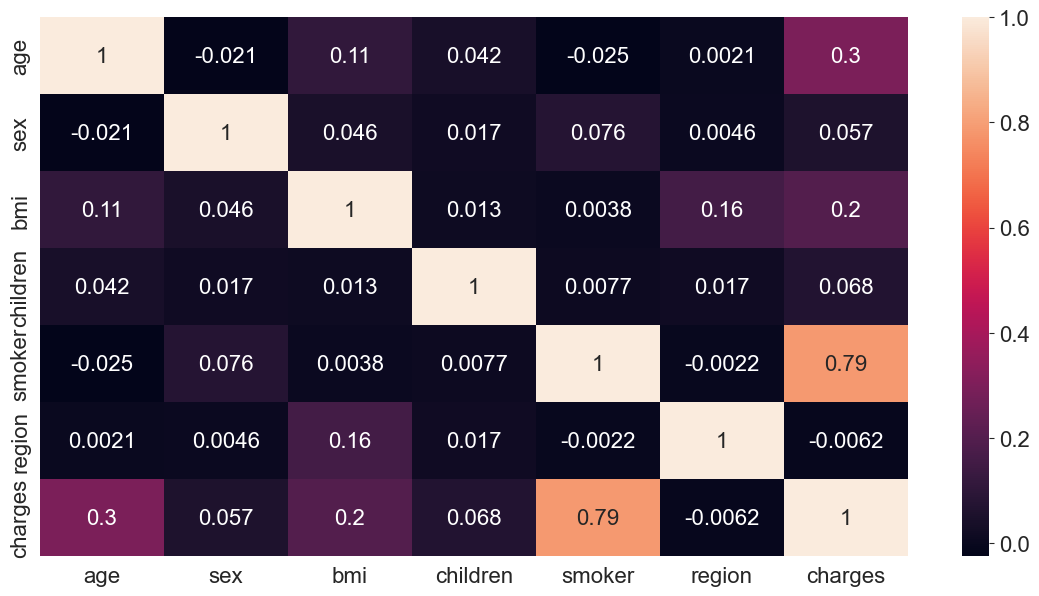

In [43]:
sns.heatmap(data.corr(), annot = True)